In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**extracting --- renamed_healthy**

In [2]:
import zipfile

zip_file_path = '/content/drive/MyDrive/renamed_healthy-20250807T190007Z-1-001.zip'
extract_to = '/content/dataset_folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


**extracting --- renamed_Wheat_Leaf_Rust**

In [3]:
import zipfile

zip_file_path = '/content/drive/MyDrive/renamed_Wheat_Leaf_Rust-20250807T190003Z-1-001.zip'
extract_to = '/content/dataset_folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


**extracting --- renamed_Wheat_Loose_Smut**

In [6]:
import zipfile

zip_file_path = '/content/drive/MyDrive/renamed_Wheat_Loose_Smut-20250807T185949Z-1-001.zip'
extract_to = '/content/dataset_folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


**count of images in each category.**

In [9]:
import os

# Folder paths for each category
healthy_folder = '/content/dataset_folder/renamed_healthy'
rust_folder = '/content/dataset_folder/renamed_Wheat_Leaf_Rust'
smut_folder = '/content/dataset_folder/renamed_Wheat_Loose_Smut'

# Count the number of images in each folder
healthy_count = len(os.listdir(healthy_folder))
rust_count = len(os.listdir(rust_folder))
smut_count = len(os.listdir(smut_folder))

print(f"Healthy Leaves: {healthy_count} images")
print(f"Leaf Rust: {rust_count} images")
print(f"Wheat Loose Smut: {smut_count} images")


Healthy Leaves: 1278 images
Leaf Rust: 135 images
Wheat Loose Smut: 918 images


***Step-by-Step Data Preprocessing.***

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Visualize Some Sample Images

Healthy Leaf Samples:


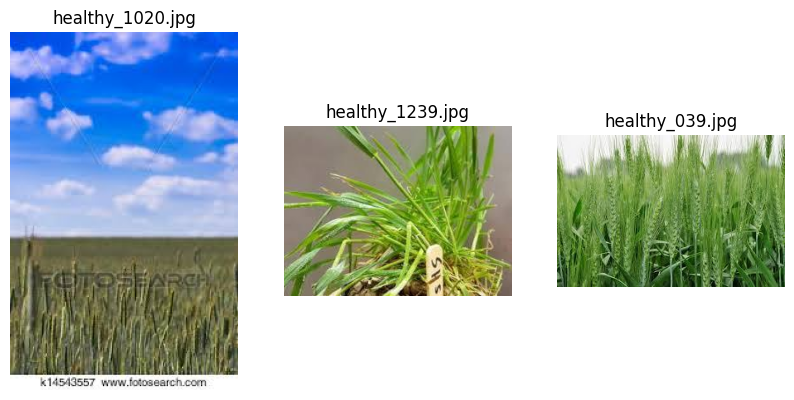

Leaf Rust Samples:


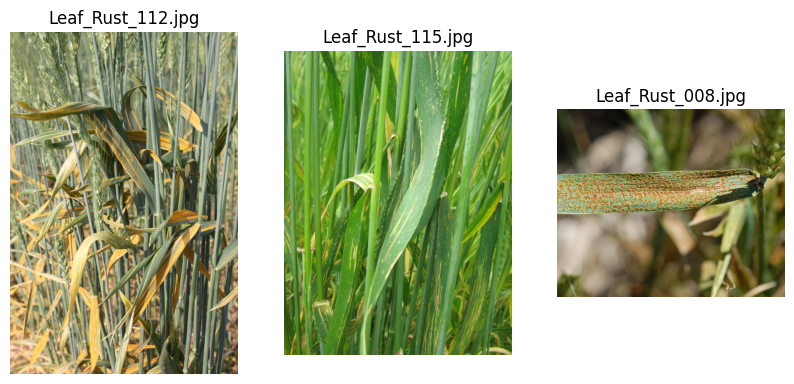

Loose Smut Samples:


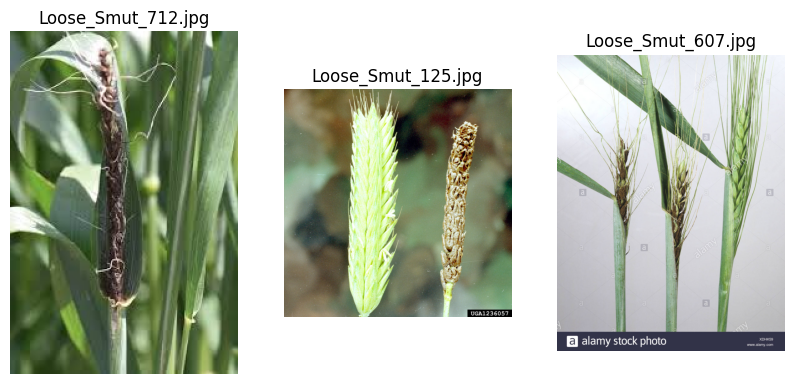

In [12]:
# Define folder paths
healthy_folder = '/content/dataset_folder/renamed_healthy'
rust_folder = '/content/dataset_folder/renamed_Wheat_Leaf_Rust'
smut_folder = '/content/dataset_folder/renamed_Wheat_Loose_Smut'

# Display random sample images from each category
def display_sample_images(folder, num_samples=3):
    files = os.listdir(folder)
    sample_files = np.random.choice(files, num_samples)

    plt.figure(figsize=(10, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file)

    plt.show()

# Display samples from each folder
print("Healthy Leaf Samples:")
display_sample_images(healthy_folder)

print("Leaf Rust Samples:")
display_sample_images(rust_folder)

print("Loose Smut Samples:")
display_sample_images(smut_folder)


 Check the Image Dimensions

In [14]:
def check_image_dimensions(folder):
    dimensions = set()
    files = os.listdir(folder)

    for file in files:
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        dimensions.add(img.size)  # Add the image size (width, height)

    return dimensions

# Check image dimensions for each class
healthy_dimensions = check_image_dimensions(healthy_folder)
rust_dimensions = check_image_dimensions(rust_folder)
smut_dimensions = check_image_dimensions(smut_folder)

print(f"Healthy Leaves Dimensions: {healthy_dimensions}")
print(f"Leaf Rust Dimensions: {rust_dimensions}")
print(f"Wheat Loose Smut Dimensions: {smut_dimensions}")


Healthy Leaves Dimensions: {(250, 150), (178, 283), (179, 282), (205, 246), (243, 208), (1985, 1381), (225, 224), (1300, 869), (200, 252), (177, 284), (203, 248), (1200, 800), (223, 226), (189, 267), (276, 183), (375, 305), (1000, 613), (3008, 2000), (900, 1200), (259, 194), (724, 483), (866, 1360), (331, 152), (280, 180), (197, 255), (266, 190), (252, 200), (272, 185), (257, 196), (220, 147), (600, 398), (287, 176), (112, 150), (2500, 1660), (247, 204), (250, 200), (371, 136), (279, 181), (1500, 1072), (284, 177), (338, 450), (270, 187), (400, 126), (299, 168), (343, 147), (290, 174), (653, 434), (291, 173), (246, 205), (188, 218), (251, 201), (245, 206), (641, 597), (3264, 1836), (262, 192), (269, 188), (298, 169), (301, 168), (800, 480), (600, 400), (260, 194), (1000, 663), (281, 180), (270, 180), (190, 190), (348, 145), (450, 321), (768, 1024), (293, 172), (318, 159), (650, 394), (1300, 866), (1600, 1155), (231, 218), (2848, 4288), (870, 580), (860, 460), (312, 161), (403, 364), (3

**resize images**

In [16]:
def resize_and_save_images(folder, target_size=(224, 224)):
    files = os.listdir(folder)

    for file in files:
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)

        # Convert the image to 'RGB' if it's not already in that mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image
        img_resized = img.resize(target_size)

        # Save the resized image
        img_resized.save(os.path.join(folder, f"resized_{file}"))

    print("Resizing and saving completed!")

# Resize and save images in each class folder
resize_and_save_images(healthy_folder)
resize_and_save_images(rust_folder)
resize_and_save_images(smut_folder)


Resizing and saving completed!
Resizing and saving completed!
Resizing and saving completed!


In [17]:
# List the files in each folder to confirm the resized images are saved
def list_files_in_folder(folder):
    files = os.listdir(folder)
    print(f"Files in {folder}:")
    for file in files:
        print(file)

# Check the files in each folder
list_files_in_folder(healthy_folder)
list_files_in_folder(rust_folder)
list_files_in_folder(smut_folder)


Files in /content/dataset_folder/renamed_healthy:
resized_healthy_937.jpg
resized_healthy_1106.jpg
healthy_234.jpg
resized_healthy_570.jpg
resized_healthy_1177.jpg
healthy_343.jpg
resized_healthy_566.jpg
healthy_293.jpg
healthy_1130.jpg
resized_healthy_114.jpg
resized_healthy_357.jpg
healthy_456.jpg
healthy_784.jpg
healthy_1008.jpg
healthy_227.jpg
healthy_1136.jpg
healthy_148.jpg
resized_healthy_892.jpg
healthy_998.jpg
resized_healthy_601.jpg
resized_healthy_414.jpg
healthy_1178.jpg
healthy_795.jpg
resized_healthy_562.jpg
healthy_754.jpg
healthy_734.jpg
resized_healthy_1040.jpg
resized_healthy_633.jpg
healthy_292.jpg
healthy_1235.jpg
resized_healthy_333.jpg
healthy_608.jpg
resized_healthy_972.jpg
healthy_926.jpg
resized_healthy_334.jpg
resized_healthy_005.jpg
healthy_303.jpg
resized_healthy_200.jpg
resized_healthy_286.jpg
resized_healthy_517.jpg
healthy_182.jpg
healthy_1000.jpg
resized_healthy_384.jpg
healthy_296.jpg
healthy_374.jpg
healthy_881.jpg
healthy_289.jpg
resized_healthy_710.j

In [19]:
import os
from PIL import Image

# Function to resize and save images to new folders
def resize_and_save_to_new_folders(folder, target_size=(224, 224), resized_folder_name="resized"):
    # Create a new folder for resized images inside the original folder
    resized_folder = os.path.join(folder, resized_folder_name)
    os.makedirs(resized_folder, exist_ok=True)

    # Process each image
    files = os.listdir(folder)

    for file in files:
        img_path = os.path.join(folder, file)

        # Skip directories and only process files
        if os.path.isdir(img_path):
            continue

        img = Image.open(img_path)

        # Convert to 'RGB' if not already in that mode
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image
        img_resized = img.resize(target_size)

        # Save the resized image in the new folder with a "resized_" prefix
        resized_image_path = os.path.join(resized_folder, f"resized_{file}")
        img_resized.save(resized_image_path)

    print(f"Resized images saved in {resized_folder}")

# Define paths for original folders
healthy_folder = '/content/dataset_folder/renamed_healthy'
rust_folder = '/content/dataset_folder/renamed_Wheat_Leaf_Rust'
smut_folder = '/content/dataset_folder/renamed_Wheat_Loose_Smut'

# Resize and save images into new folders
resize_and_save_to_new_folders(healthy_folder)
resize_and_save_to_new_folders(rust_folder)
resize_and_save_to_new_folders(smut_folder)


Resized images saved in /content/dataset_folder/renamed_healthy/resized
Resized images saved in /content/dataset_folder/renamed_Wheat_Leaf_Rust/resized
Resized images saved in /content/dataset_folder/renamed_Wheat_Loose_Smut/resized


**Code to Compare Counts:**

In [20]:

def count_images_in_folder(folder):
    # List files in the folder
    files = os.listdir(folder)
    # Filter out directories, count only image files
    image_files = [f for f in files if os.path.isfile(os.path.join(folder, f))]
    return len(image_files)

# Check the count of original renamed images
healthy_renamed_count = count_images_in_folder(healthy_folder)
rust_renamed_count = count_images_in_folder(rust_folder)
smut_renamed_count = count_images_in_folder(smut_folder)

# Check the count of resized images in the new "resized" folders
healthy_resized_count = count_images_in_folder(os.path.join(healthy_folder, "resized"))
rust_resized_count = count_images_in_folder(os.path.join(rust_folder, "resized"))
smut_resized_count = count_images_in_folder(os.path.join(smut_folder, "resized"))

# Print the counts to verify
print(f"Healthy Leaves (Renamed) count: {healthy_renamed_count}")
print(f"Healthy Leaves (Resized) count: {healthy_resized_count}")
print(f"Leaf Rust (Renamed) count: {rust_renamed_count}")
print(f"Leaf Rust (Resized) count: {rust_resized_count}")
print(f"Wheat Loose Smut (Renamed) count: {smut_renamed_count}")
print(f"Wheat Loose Smut (Resized) count: {smut_resized_count}")


Healthy Leaves (Renamed) count: 2571
Healthy Leaves (Resized) count: 2571
Leaf Rust (Renamed) count: 270
Leaf Rust (Resized) count: 270
Wheat Loose Smut (Renamed) count: 1836
Wheat Loose Smut (Resized) count: 1836


**Verify Image Dimensions**

In [21]:
def verify_resized_images(folder, target_size=(224, 224)):
    resized_folder = os.path.join(folder, "resized")
    files = os.listdir(resized_folder)

    # Check the size of a few resized images
    for i, file in enumerate(files[:5]):  # Check first 5 resized images
        img_path = os.path.join(resized_folder, file)
        img = Image.open(img_path)
        if img.size != target_size:
            print(f"Image {file} has incorrect size: {img.size}")
        else:
            print(f"Image {file} is correctly resized to: {img.size}")

# Verify resized images for each class
verify_resized_images(healthy_folder)
verify_resized_images(rust_folder)
verify_resized_images(smut_folder)


Image resized_resized_healthy_1167.jpg is correctly resized to: (224, 224)
Image resized_healthy_937.jpg is correctly resized to: (224, 224)
Image resized_resized_healthy_021.jpg is correctly resized to: (224, 224)
Image resized_healthy_1106.jpg is correctly resized to: (224, 224)
Image resized_resized_healthy_594.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_002.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_072.jpg is correctly resized to: (224, 224)
Image resized_Leaf_Rust_104.jpg is correctly resized to: (224, 224)
Image resized_resized_Leaf_Rust_062.jpg is correctly resized to: (224, 224)
Image resized_resized_Leaf_Rust_097.jpg is correctly resized to: (224, 224)
Image resized_Loose_Smut_688.jpg is correctly resized to: (224, 224)
Image resized_resized_Loose_Smut_397.jpg is correctly resized to: (224, 224)
Image resized_resized_Loose_Smut_062.jpg is correctly resized to: (224, 224)
Image resized_resized_Loose_Smut_693.jpg is correctly resized to:

**Data Augmentation & Generators:**

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill missing pixels after transformation
)

# Set up ImageDataGenerator for validation (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Path to the resized images folders
train_data_path = '/content/dataset_folder/'

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
)

# Create validation data generator (if you have separate validation data)
validation_generator = validation_datagen.flow_from_directory(
    train_data_path,  # Here, you can specify a separate validation folder
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical',
)


Found 9354 images belonging to 3 classes.
Found 9354 images belonging to 3 classes.


**Confirm the Image Count and Class Distribution**

In [23]:
# Get class distribution from the train_generator
class_counts = train_generator.class_indices
print(f"Class labels: {class_counts}")


Class labels: {'renamed_Wheat_Leaf_Rust': 0, 'renamed_Wheat_Loose_Smut': 1, 'renamed_healthy': 2}


**Preview the Data Augmentation**

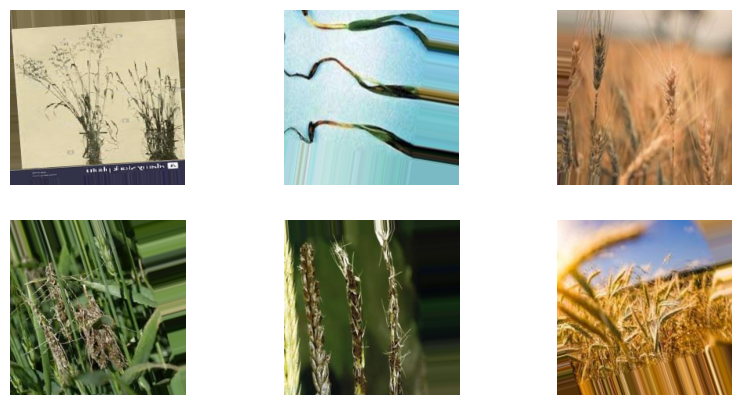

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a batch of augmented images
x_batch, y_batch = next(train_generator)

# Display the first few images from the batch
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])  # Display the image
    plt.axis('off')
plt.show()


**Check for Image Quality and Preprocessing**

In [25]:
# Check the first image in the generator
first_image = x_batch[0]
print(f"Image shape: {first_image.shape}")
print(f"Image pixel values range: {first_image.min()} to {first_image.max()}")


Image shape: (224, 224, 3)
Image pixel values range: 0.0015284102410078049 to 1.0
